<a href="https://colab.research.google.com/github/Sidharth-NK/ML_PROJECTS/blob/main/Handwritten_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# this make sure that the plots are displayed within the notebook and not in seperate windows
%matplotlib inline
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
len(x_train)

60000

In [6]:
x_train.shape

(60000, 28, 28)

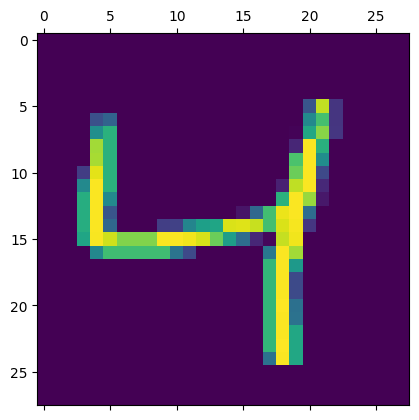

In [7]:
plt.matshow(x_train[2])

In [8]:
# used to scale down the values between 0 - 1
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now we need to flatten the input data from 28x28 to column matrix

In [10]:
# flattens the trining and test data into a single column matrix
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

now we need to create a simple neural netwok using tensor and keras


In [11]:
# Here sequential means i am having a stack of layers in my neural network
model = keras.Sequential([
     keras.layers.Dense(units=10,input_shape=(784,),activation='sigmoid') #10 units means 10 neurons output
])
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5) # this is where the training happens

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8141 - loss: 0.7250
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9115 - loss: 0.3113
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9199 - loss: 0.2851
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9237 - loss: 0.2739
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9260 - loss: 0.2655


Now lets try to evaluate the accuracy on test data set, cuz when it is running training it is evaluating accuracy on training data set.

but when we deploy the model for production we need to always check the accuracy of a test dataset.

In [12]:
model.evaluate(x_test_flattened,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9147 - loss: 0.3020


[0.2659633159637451, 0.9261000156402588]

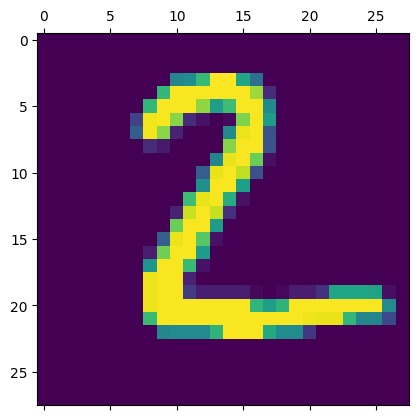

In [13]:
plt.matshow(x_test[1])

In [14]:
# Sample prediction
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.8822035e-01, 3.0287961e-03, 9.9922109e-01, 4.1445625e-01,
       4.9617377e-10, 8.0779630e-01, 8.5806841e-01, 8.8571403e-13,
       1.0780314e-01, 2.0941078e-09], dtype=float32)

In [15]:
np.argmax(y_predicted[1])

2

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

to see how prediction look like , we look at confusion matrix

In [17]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    8,    3,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    8,  921,   17,    8,    3,   13,   10,   43,    3],
       [   3,    0,   17,  925,    1,   21,    2,   10,   25,    6],
       [   1,    1,    3,    1,  922,    0,   13,    4,   11,   26],
       [   9,    3,    4,   37,   10,  771,   14,    8,   30,    6],
       [   9,    3,    6,    1,    7,   11,  917,    2,    2,    0],
       [   1,    6,   23,    3,    6,    0,    0,  956,    3,   30],
       [   5,    7,    7,   22,    9,   20,    9,   13,  877,    5],
       [   9,    7,    2,   10,   33,    6,    0,   29,   11,  902]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

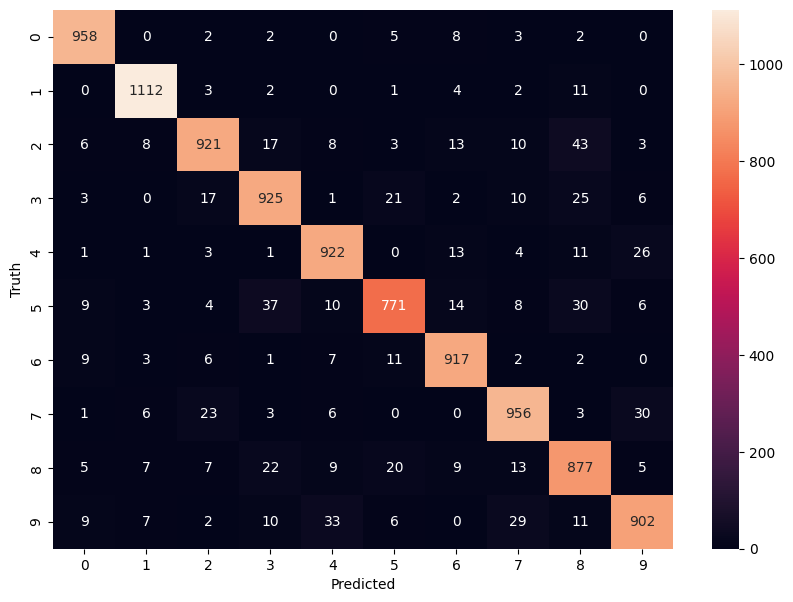

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

adding a hidden layer


In [19]:
# Here sequential means i am having a stack of layers in my neural network
model = keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation='relu'), #10 units means 10 neurons output
     keras.layers.Dense(units=10,activation='sigmoid')
])
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5) # this is where the training happens

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8703 - loss: 0.4520
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9604 - loss: 0.1305
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9744 - loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9809 - loss: 0.0655
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0523


In [20]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9753 - loss: 0.0861


[0.07348695397377014, 0.9786999821662903]

In [21]:
int(7.5)

7